# Анализ рынка заведений общественного питания Москвы

Исследование проведено по заказу фонда «Shut Up and Take My Money» на основе данных о заведениях общепита Москвы на лето 2022 года.

Анализ проводится на основе данных сервисов Яндекс.Карты и Яндекс.Бизнес. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Важно учесть это как человеческий фактор
 при оценке результатов.

Планируется открытие заведения, расположение и категория (кафе, ресторан, паб, пр.) которого ещё не определены, как цены в заведении.


**Цель исследования:**

Выявить, какими характерными признаками обладают наиболее популярные заведения общепита, а также найти закономерности, которые помогут сделать выбор в пользу той или иной категории, расположения или среднего чека.

**Поставленные вопросы:**

1. Сколько всего кофеен в датасете? 
2.  В каких районах их больше всего, каковы особенности их расположения?
3.  Есть ли круглосуточные кофейни?
4.  Какие у кофеен рейтинги? Как они распределяются по районам?
5.   На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?
6. Какие часы работы у самых популярных кофеен?
7. Сколько кофеен есть среди топ-15 популярных сетей?

Анализ проводится на основе данных сервисов Яндекс.Карты и Яндекс.Бизнес. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Важно учесть это как человеческий фактор при оценке результатов.

**Презентация:** <https://disk.yandex.ru/d/O5LDkpC0uyfYHQ>

**Ход исследования:**

Данные о заведениях общепита я получу из файла `/datasets/moscow_places.csv`. О качестве данных ничего не известно, поэтому перед тем, как приступить канализу, я проведу их предобработку.\
После этого я проверю данные на ошибки и оценю их влияние на результаты исследования. Далее, на этапе обработки, я поищу возможность исправить все ошибки, которые могут привести к искажению результатов.\
Далее я создам новые столбцы, в которых отражу дополнительные факторы, необходимые для исследования. После обработки ошибок и создания новых столбцов я перейду непосредственно к анализу рынка общепита Москвы.\
Я проанилизую ряд факторов и взаимосвязей, чтобы многогранно взглянуть на данные и выявить интересные закономерности.\
В конце исследования я подведу итоги и отвечу на поставленные вопросы.

Таким образом, моё исследование пройдёт в восемь этапов:
1. Обзор данных
2. Предобработка данных
3. Добавление новых столбцов и расчёты
4. Проведение анализа для рынка общественного питания Москвы
5. Финальные выводы
6. Ответы на поставленные вопросы
7. Подведение итогов
8. Общий вывод по результатам анализа.

## Обзор данных

Импортирую необходимые для работы библиотеки.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import median
import re
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px
import folium
from folium import Map, Choropleth
import json
import warnings
from folium import Map, Marker
from folium.plugins import MarkerCluster
from folium.features import CustomIcon

Загружаю файл для дальнейшей работы.

In [ ]:
try:
    df = pd.read_csv('/datasets/moscow_places.csv')
except:
    df = pd.read_csv('moscow_places.csv')

Таблица выглядит так:

In [ ]:
df.head()

Вывожу информацию о данных.

In [ ]:
df.info()

Из этой информации заметно, что:

   1. В датасете есть информация о 8406 заведениях общепита.
   1. В колонках встречаются пропуски.
   2. Форматы колонок соответствуют нужным. В колонках price, avg_bill и hours содержатся числа, но с комментариями, которые составляют разные категории. Поэтому формат этих колонок - строковой.

## Предобработка данных

### Работа с дубликатами

Сначала проверяю данные на наличие строк-дубликатов:

In [ ]:
print(f'Количество строк-дубликатов в таблице: {df.duplicated().sum()}')

Полностью дублирующихся строк в таблице нет.\
Потенциально есть неявные дубликаты среди названий кофеен, вывожу самые частые названия заведений, содержащих дефис или верхний апостроф.

In [ ]:
df[df['name'].str.contains("['-]")]['name'].value_counts()

Для того, чтобы избавиться от неявных дубликатов, провожу действия:
* Привожу все символы к строковым
* Заменяю дефисы, точки, нижние подчеркивания и апострофы на пробел

После изменения убеждаюсь в том, что не осталось названий с этими символами.

In [ ]:
df['name'] = df['name'].str.lower()
for w in ['-', '.', '_', "'"]:
    df['name'] = df['name'].str.replace(w, ' ', regex=True)
    
cg = df['name'].str.contains("[-._']").sum()
print(f'Осталось {cg} названий заведений со спец. символами')

Отлично. Теперь ещё раз смотрю на популярные названия заведений.

In [ ]:
df['name'].value_counts().head(10)

Поскольку в названии Домино'с пицца есть апостроф, предполагаю, что есть неявные дубликаты с этим названием. Проверяю:

In [ ]:
df[df['name'].str.contains('домино')]['name'].value_counts()

Обнаружены неявные дубликаты - привожу названия к одному.

In [ ]:
for q in ['домино с пицца', 'домино с']:
    df['name'] = df['name'].str.replace(q, 'доминос пицца')
df[df['name'].str.contains('домино')]['name'].value_counts()

Готово.

Для того, чтобы исключить неявные дубликаты в остальных колонках, привожу записи в к строковым значениям - разница в шрифте может создать неявные дубли.

**Важный аспект:** поскольку в дальнейшем я буду работать с JSON-файлом, содержащим названия районов Москвы, необходимо полное совпадения написания районов в датасете Яндекс.Карт и написания в JSON-файле. Поэтому стобец `District` остаётся без изменений.

In [ ]:
for i in df:
    if df[i].dtype == object or df[i].dtype == str:
        if i == 'district':
            pass
        else:
            df[i] = df[i].str.lower()
    else:
        pass
    dubls = df[i].duplicated().sum()
    datasize = df.shape[0]
    perc1 = (dubls / datasize * 100).round(2)
    print(f'Количество дублей в колонке {df[i].name}: {dubls}, или {perc1}% от данных')
    print(f'Кол-во уникальных значений в колонке: {df[i].nunique()}')
    print()

Для понимания природы дублей обращусь к описанию данных.

* `name` — название заведения. Дубли могут встречаться, поскольку в датасете есть сетевые кофейни с одним названием.

* `category` — категория заведения, например «кафе», «пиццерия» или «кофейня». То есть дубли - это нормальное явление.\
* `address` — адрес заведения. Несколько кофеен могут находиться по одному адресу, например, в бизнес-центре или на фуркорте, поэто дубликаты ожидаемы.\
* `district` — административный район, в котором находится заведение. Названия районов могут повторяться.\
hours — информация о днях и часах работы. Дубликаты ожидаемы, ведь в среднем кофейни работают по одному графику.\
* `lat` и `lng` — широта и долгота долгота географической точки, они вполне могут повторяться.\
* `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0). Дубликаты ожидаемы.\
* `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее. Это также категории, где могут быть дубликаты.\
* `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона. Средняя стоимость ожидаемо может повторяться.\
* `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт». Аналогично предыдущей колонке дубли ожидаемы.\
* `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино». Также дубли могут быть.\
* `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым. Тут дубли неизбежны.\
* `seats` — количество посадочных мест. Оно может повторяться для разных кофеен.

Таким образом, во всех колонках могут встречаться дубли, и это обосновано.\
Дополнительно посмотрю уникальные значения в колонках, содержащих категориальные данные, чтобы убедиться, что неявных дублей (в виде опечаток) нет.

In [ ]:
print('Уникальные названия категорий в колонках датасета')
print()
for k in ['category', 'district', 'price', 'chain']:
    display(f'Колонка {df[k].name}:')
    display(df[k].value_counts())

Готово - неявных дубликатов не обнаружено.

**Итог по дубликатам:**\
В данных есть большое количество дубликатов, наличие которых обосновано природой самих данных: почти все колонки содержат названия категорий, которые могут повторяться. Также могут повторяться и географические координаты (широта и долгота).\
Полностью дублирующихся строк не обнаружено.\
В названиях сетевых заведений обнаружены неявные дубликаты, которые связаны с разным написанием одних и тех же названий. Для их устранения все особенные символы, вызывающие разное написание названий, были заменены на пробел, а сами названия приведены к строковому формату шрифта.\
В остальных колонках, помимо названия кофеен, неявных дублей не обнаружено.

### Яндекс лавка
В датасете есть много информаций о точках Яндекс.лавки, однако она не является полноценным заведением с залом, официантами и кассой - фактически это дарксторы, где собираются заказы.\
Вот информация о записях с названием "яндекс лавка"

In [ ]:
df.query('name == "яндекс лавка"').info()

Всего 72 точки, для всех не указана ни ценовая категория, нет инфо о суммах чека и чашки кофе, а также в половине точек отсутствует инфо о количестве мест. Да и речь о сидячих местах для посетителей, однако в дарксторе нет зоны для клиентов. Поэтому учитывать Лавку в дальнейшем исследовании будет некорректно. Вырезаю из датасета все строки с Лавкой.

In [ ]:
df = df.query('name != "яндекс лавка"')

### Работа с пропусками

Вывожу количество пропусков по колонкам с указанием процента.

In [ ]:
for q in df:
    nulls = df[q].isna().sum()
    datasize = df.shape[0]
    if nulls > 0:
        perc2 = (nulls / datasize * 100).round(2)
        print(f'Количество пропусков в колонке {df[q].name}: {nulls}, или {perc2}% от данных')
        print()
    else:
        pass

Для удобства ещё раз отмечаю информацию о колонках с пропусками:

``hours`` - дни и часы работы заведения;\
`price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;\
`avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:\
«Средний счёт: 1000–1500 ₽»;\
«Цена чашки капучино: 130–220 ₽»;\
«Цена бокала пива: 400–600 ₽».\
`middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:\
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.\
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.\
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.\
`middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:\
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.\
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.\
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.\
`seats` — количество посадочных мест.


Таким образом, большинство пропусков связано с тем, что нет значений в колонке  avg_bill, или средняя стоимость заказа. Колонки middle_avg_bill и middle_coffee_cup берут значения из avg_bill, поэтому пропуски в них неудивительны.

Заполнение любых из этих пропусков может привести к некорректной статистике, поэтому заполнение недопустимо, как и удаление пропусков, поскольку они составляют существенную часть данных. По имеющимся данным сложно сделать выводы о часах работы или количестве мест, ведь эти данные могут отличаться даже в рамках одной сети.

Также не имеет смысла заполнять пропуски в строках, содержащих цены и их характеристики, на основании других заведений сети, поскольку это не будет препятствием для дальнейшего анализа - данные по ценам сети будут взяты из тех строк, где они указаны. Ведь в рамках одной сети цены, как правило, установлены одинаковые.

**Итог по пропускам:**\
В данных есть пропуски, а именно среди часов работы заведения (около 6% пропусков), а также большое количество пропусков в колонках, указывающих на среднюю стоимость заказа, средний чек и среднюю стоимость чашки кофе (более 50% пропусков в каждой колонке). Колонки с ценами взаимосвязаны с колонкой avg_bill, поэтому одни пропуски вызвали другие. Также есть пропуски в количестве мест в заведении - 43% пропусков.\
Удаление или заполнение этих пропусков исказит результаты анализа, поэтому они оставлены без изменений. Это позволит избежать их влияния на итоговые выводы.

### Работа с аномалиями

Стоит дополнительно изучить колонки rating, seats, а также колонки с информацией о стоимости на наличие аномалий.\
Колонка с рейтингом должна содержать числа от 1 до 5.

In [ ]:
df['rating'].describe()

Все в порядке. теперь - стоимость.

Для того, чтобы корректно оценить количество посадочных мест, сначала нужно исследовать данные на предмет аномалий. Возможно, есть точки, в которых гораздо больше мест, чем в среднем по категории таких точек, и они повлияют на результаты.\
Использую точечный график, чтобы посмотреть на общую картину:

In [ ]:

plt.figure(figsize=(11, 6))
plt.grid(linewidth=1)
plt.title('Количество мест в заведениях Москвы по категориям')
plt.xlabel('Количество мест')
plt.ylabel('Категория')
plt.scatter(df['seats'], df['category']);


На графике заметно, что есть аномалии: в большинстве заведений во всех категориях 400-500 мест, однако встречаются точки, где более 600, 1000 и даже 1200 мест.\
Вывожу подсчёт 95, 98 и 99 перцентиля для каждой категории, чтобы определить границы аномалий. Пропуски в количестве мест при этом удаляю для корректного подсчета перцентиля.

In [ ]:
for c in df['category'].unique():
    seat = df[df['category'] == c]['seats'].dropna()
    print(f'95, 98 и 99 перцентили количества мест в категории "{c}"')
    print(np.percentile(seat, [95, 98, 99]).astype('int'))

Исходя из точечного графика выше, а также из перцентилей, в качестве границы аномалий выбран 98 перцентиль.\
Создаю обновленную таблицу, срезая аномальные значения.

In [ ]:
horizon = dict()
for c in df['category'].unique():
    seat = df[df['category'] == c]['seats'].dropna()
    horizon[c] = np.percentile(seat, [98]).astype('int')

seats_clean = df[df['seats'] < df['category'].map(horizon)][['category', 'seats']]
seats_clean.head()

Готово! Эту таблицу я буду использовать для анализа в дальнейшем.\
Осталось оценить колонки с информацией о ценах.

In [ ]:
plt.figure(figsize=(11,6))
plt.title('Средняя цена чашки кофе')
plt.ylabel('Средняя цена')
plt.xlabel('Категория')
plt.scatter(df['category'], df['middle_coffee_cup']);
plt.grid()

Заметно аномальное значение - почти 1600 за одну чашку кофе!\
Интересно, что это за заведение?

In [ ]:
df.query('middle_coffee_cup > 1400')

Учитывая, что заведение сетевое, такая цена выглядит аномальной. Однако эту строку исключать из данных не буду, ведь она пригодится при анализе сетей. Учту этот момент, чтобы исключить аномальное значение при анализе средней цены чашки кофе.

Теперь - средний чек:

In [ ]:
plt.figure(figsize=(11,6))
plt.title('Средний чек в заведениях Москвы')
plt.ylabel('Средний чек')
plt.xlabel('Категория')
plt.grid()
plt.scatter(df['category'], df['middle_avg_bill']);

Также заметны 2 аномалии: ресторан со средним чеком в 35 000 рублей, а также бар со средним чеком более чем в 10 000 рублей. Также есть ресторан с чеком в 10 000 рублей, однако это нормальное значение для ресторана.

In [ ]:
df.query('middle_avg_bill > 10000')

Цены выглядят странно: средний чек в 11 тысяч для чайханы нереалистичен (плюс есть большие сомнения, что чайхана может являться баром или пабом), средний чек ресторана без указанного названия в 35 000 также сильно выбивается из общей картины. Эти заведения не являются сетевыми и могут повлиять на результаты анализа цен, поэтому исключаю их из анализа.\
В отфильтрованный датасет также оставляю строки, где значение среднего чека не заполнено.

In [ ]:
df = df.query('middle_avg_bill < 11000 or middle_avg_bill.isna()')

Готово! Аномалии изучены, перехожу к новым колонкам.

### Добавление новых колонок

Добавляю колонку street, в которую будет вынесено название улицы из адреса заведения.

In [ ]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия', 'мкад']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

df['street'] = df['address'].str.extract(str_pat, 
                                         flags=re.I)

А также колонку, в которой будет указано, работает ли заведение ежедневно и круглосуточно. Если указано True, значит, оно работает 24/7, в остальных случаях - False. Сразу после этого проверяю содержимое новой колонки.

In [ ]:
df['is_24_7'] = (df['hours'].str.contains('круглосуточно')) & \
                (df['hours'].str.contains('ежедневно'))

df['is_24_7'].value_counts()

721 заведение, работающее 24/7, против 7611, у которых иной график работы.

Проверяю новые колонки:

In [ ]:
df.info()

Отлично, можно переходить к анализу.

## Анализ данных

### Распределение заведений по категориям

Провожу анализ категорий заведений. Строю сводную таблицу, в которой указано количество заведений в каждой категории, и строю график.

In [ ]:
types = df.groupby('category', 
                   as_index=False).agg({'name':'count'}).sort_values('name')
types['perc'] = (types['name'] / 
                 types['name'].sum() 
                 * 100).round(1)

plt.figure(figsize=(16,7))
sns.set(font_scale=1.3)
plt.title('Распределение категорий заведений в Москве')

sns.barplot(x='category', y='name', data=types.sort_values('name'), palette='tab20b')
     
values = types['perc']
for i, value in enumerate(values):
    plt.text(i, value + 100, value, ha='center', va='center')
plt.xlabel('Категория и % от всех заведений')
plt.yticks(range(0,2600,200))
plt.grid(axis='x')
plt.ylabel('Количество заведений');

**Вывод:**  наглядно видно, что самую большую долю всех заведений составляют рестораны, кафе и кофейни. Кафе - **28.5%**, рестораны - **23.6%** и кофеен - **17%**.\
Меньше всего - булочных.

### Анализ количества посадочных мест по категориям

Строю график по очищенным на этапе предобработки данным. Использую медианное количество мест в категории, поскольку медиана более устойчива к выбросам, чем среднее.

In [ ]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.3)

plt.title('Количество мест в заведениях Москвы по категориям')

rate = seats_clean.groupby('category', as_index=False).agg({'seats':'median'}).sort_values('seats')['category']

sns.boxplot(x='category', y='seats', data=seats_clean, order=rate,  palette='tab20b')
plt.grid()
plt.xlabel('Категория')
plt.yticks(range(0,600,50))
plt.grid()
plt.ylabel('Медианное количество сидячих мест');

**Вывод:** Самая большая вместимость в среднем у ресторанов (более 80 мест), баров/пабов (80 мест) и кофеен (более 70 мест).\
Заведения быстрого питания в среднем имеют одинаковую вместимость. Самый большой разброс по количеству мест - у кафе.

### Соотношение сетевых и несетевых заведений

Строю круговую диаграмму, отражая количество сетевых и несетевых заведений в Москве.

In [ ]:
chains = df.groupby('chain', 
                   as_index=False).agg({'name':'count'})
chains['chain'] = ['Несетевые', 'Сетевые']
colors = px.colors.sequential.RdBu

fig = go.Figure(data=[go.Pie(labels=chains['chain'],
                             values=chains['name'], marker=dict(colors=colors))])
                             

fig.update_layout(title='Распределение заведений в Москве', title_x = 0.50, 
    legend=dict(title='Категории'), legend_x=0.8, legend_y=0.6, font=dict(size=16))

fig.show()

**Вывод:** значительная часть заведений Москвы является сетевыми - 38% сетевых заведений против 62% несетевых.

### Какие категории чаще являются сетевыми

Теперь разделяю данные о заведениях по категориям, после чего считаю, сколько процентов заведений в этой категории составляют сетевые точки, и сколько - несетевые.

In [ ]:
chain_data = df[['name','category','chain']]
list_count = chain_data.groupby('category', 
                                as_index=False).agg({'name':'count'})
list_chain = chain_data.groupby(['category','chain'],
                                as_index=False).agg({'name':'count'}).merge(list_count, 
                                                                            on='category')
list_chain['perc'] = (list_chain['name_x'] /
                      list_chain['name_y'] * 100).round(1)

chain_final = list_chain[['category', 'name_x', 'name_y', 'perc', 'chain']].sort_values('perc', 
                                                                                        ascending=False)
chain_final['chain'] = chain_final['chain'].replace({0:'несетевые', 1:'сетевые'})

plt.figure(figsize=(16,7))
sns.barplot(x='category', y='perc', data=chain_final, estimator=median, hue='chain', palette='Accent')
plt.grid()
plt.title('Доля несетевых и сетевых заведений в каждой из категорий в процентах')
plt.xlabel('Категория')
plt.yticks(range(0,80,10))
plt.grid()
plt.ylabel('Процент сетевых заведений в категории, %');
plt.legend(loc='lower right', fontsize=18);

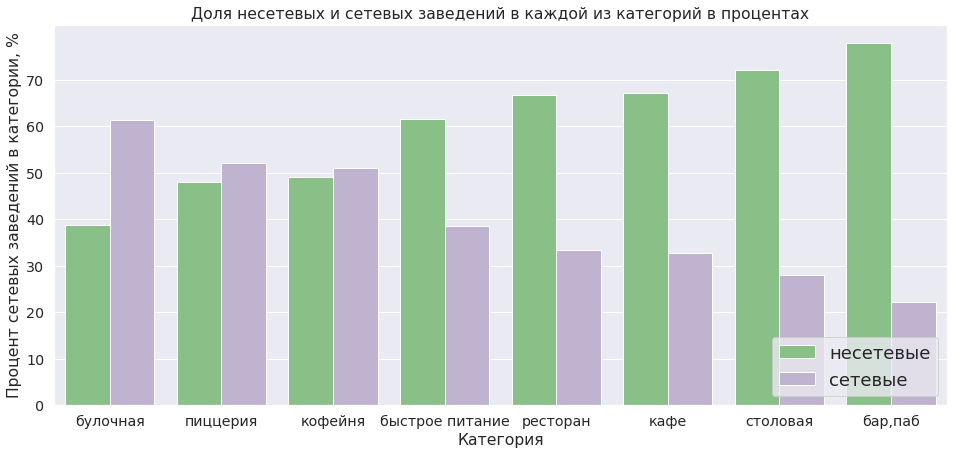

In [35]:
# Код ревьюера

chain_data = df[['name','category','chain']]
list_count = chain_data.groupby('category', 
                                as_index=False).agg({'name':'count'})
list_chain = chain_data.groupby(['category','chain'],
                                as_index=False).agg({'name':'count'}).merge(list_count, 
                                                                            on='category')
list_chain['perc'] = (list_chain['name_x'] /
                      list_chain['name_y'] * 100).round(1)

chain_final = list_chain[['category', 'name_x', 'name_y', 'perc', 'chain']].sort_values('perc', 
                                                                                        ascending=False)
chain_final['chain'] = chain_final['chain'].replace({0:'несетевые', 1:'сетевые'})

plt.figure(figsize=(16,7))
sns.barplot(x='category', y='perc', data=chain_final.sort_values('perc').sort_values('chain'), estimator=median, hue='chain', palette='Accent')
plt.grid()
plt.title('Доля несетевых и сетевых заведений в каждой из категорий в процентах')
plt.xlabel('Категория')
plt.yticks(range(0,80,10))
plt.grid()
plt.ylabel('Процент сетевых заведений в категории, %');
plt.legend(loc='lower right', fontsize=18);

**Вывод:** Больше всего сетевых заведений в категории "булочная" - 60% от всех заведений. После этого идут пиццерии и кофейни - в каждой из этих категорий доля сетевых заведений составляет около 50%.

### Топ-15 популярных сетей в Москве

Переходу к поиску самых популярных (исходя из количества) сетевых заведений в Москве.

In [ ]:
top15 = df.query('chain ==1').groupby('name', 
                                      as_index=False).agg({'lat':'count'}).sort_values('lat', 
                                                                                       ascending=False).head(15)

top15.columns = ['Сеть', 'Заведений']

fig = px.bar(top15.sort_values(by='Заведений', ascending=True), 
             x='Заведений',
             y='Сеть', 
             text='Заведений', color_discrete_sequence=colors)

fig.update_layout(title='ТОП-15 сетей Москвы по количеству заведений',
                   xaxis_title='Количество заведений',
                   
                   font=dict(size=14))
fig.show()

Также нужно оценить, к какой категории заведений относятся эти сети.\
Однако, возможно, что в одной сети может быть несколько категорий.\
Проверяю это и вывожу на экран сети, в которых количество категорий больше 1.

In [ ]:
listname = []
listcateg = []
for t in top15['Сеть']:
    brick = df[df['name'] == t]
    if brick['category'].nunique() > 1:
        listname.append(t)
        categs = brick['category'].value_counts()
        listcateg.append(categs.to_frame().reset_index()['index'].iloc[0])
        print(f'Сеть: {t}')
        print('Категории:')
        print(categs)
        print()
    else:
        pass

Так и есть: в нескольких сетях встречается больше одной категории.\
Это неудивительно, поскольку, как отмечено в начале проекта, данные в Яндекс.Бизнес собираются на основе открытых источников и на основе того, что указали другие пользователи. Они вполне могли трактовать ресторан как кафе, кафе как кофейню и так далее.\
В таком случае стоит ориентироваться на подавляющее большинство, если для сети указано несколько категорий.\
Вывожу таблицу, где для таких сетей указана категория, которая встречается раньше всего в рамках этой сети.

In [ ]:
topnames = pd.DataFrame({'Сеть':listname, 'Категория':listcateg})
topnames

Обновляю таблицу, содержащую инфо о топ-15 сетей с указанием категории. Для тех сетей, где указано несколько категорий, вывожу самое популярное название категории в рамках одной сети.\
Помимо этого вывожу круговую диаграмму, на которой отражено количество категорий сетей в рамках списка Топ-15.

In [ ]:
many_categories = df[df['name'].isin(top15['Сеть'])].groupby('name', 
                                   as_index=False).agg({'category':pd.Series.mode, 
                                                     'lng':'count'}).sort_values('lng', 
                                                                        ascending=False)[['name',
                                                                                          'category']].head(15)
many_categories.columns = ['Сеть', 'Категория']
top15 = top15.merge(many_categories, on='Сеть')

topcateg = df[df['name'].isin(top15['Сеть'])]
topcateg = topcateg.groupby('name', 
                 as_index=False).agg({'category':'first'}).groupby('category',
                                                                   as_index=False).agg({'name':'count'})

In [ ]:
fig = px.bar(top15.sort_values(by='Заведений', ascending=True), 
             x='Заведений', y='Сеть', color_discrete_sequence=colors, text='Заведений',
             hover_data=['Заведений','Категория']
            )

fig.update_layout(title='Топ-15 сетей Москвы по количеству заведений',
                   xaxis_title='Количество заведений',
                   yaxis_title='Название сети',
                   font=dict(size=14))
fig.show()

fig = go.Figure(data=[go.Pie(labels=topcateg['category'],
                             values=topcateg['name'], marker=dict(colors=colors))])
                             

fig.update_layout(title='Топ-15 сетей Москвы. Распределение категорий', title_x = 0.050,
    legend=dict(title='Категории'), legend_x=0.8, legend_y=0.6, font=dict(size=14))

fig.show()

**Вывод:** Среди топ-15 заведений самой популярной категорией являются кофейни - более 33% от всех заведений. С кофейнями по популярности сопоставимы только кафе - более 26%.\
Если рассматривать сами сети, то лидер по популярности - кофейня Шоколадница, у неё заметно больше точек, чем у всех остальных.\
После Шоколадницы в рейтинге следуют 2 пиццерии - Доминос пицца и Додо пицца. Далее снова идут кофейни - one price coffee и cofix.

Исходя из фактов выше - если смотреть на топ-15 популярных сетей Москвы, то наибольшую популярность имеют именно кофейни. Причём это заметно:
* В том, что кофейни составляют треть от всего топ-15
* В том, что самое популярное заведение с большим отрывом по точкам - тоже кофейня
* В том, что даже в Топ-5 популярных заведений 3 из 5 позиций занимают кофейни.

### Анализ по административным районам Москвы

Пришло время изучить карту административных районов Москвы. На первом графике - цветовое обозначение количества заведений в районах Москвы.

In [ ]:
reg = df.groupby('district', as_index=False).agg({'lat':'count'})
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron', font=dict(size=50))
Choropleth(mapbox_style="carto-positron",
    geo_data = state_geo,
data = reg,
    columns=['district', 'lat'],
    key_on='feature.name',
    fill_color='PuRd',
    fill_opacity=0.9,
    legend_name='Количество заведений в районах Москвы',
    font=dict(size=500),
).add_to(m)
m

На графике отчётливо видно, что в ЦАО, или центральном округе, гораздо больше заведений, чем в остальных категориях - более 2 000 точек. На втором месте по плотности заведений - все районы, кроме ЮЗАО, ЮВАО и СЗАО.

ЦАО на карте заметно выбивается из общей картины. Это может быть связано с большой проходимостью в центре Москвы, а также с активностью туристов в этом районе, которые посещают достопримечательности и заходят куда-то зайти. Ввиду очень высокой проходимости (по сравнению с другими районами) и наличия туристов многие хотят разместить заведение именно здесь.

Для анализа по категориям использую столбчатую диаграмму.
Сначала выводу график по районам города.

In [ ]:
reg_cat = df.groupby(['district', 'category'], as_index=False).agg({'lng':'count'})
reg_cat['district'] = \
reg_cat['district'].replace({'Северный административный округ':'САО', 
                             'Южный административный округ':'ЮАО',
                            'Восточный административный округ':'ВАО',
                            'Западный административный округ':'ЗАО',
                            'Северо-Западный административный округ':'СЗАО',
                            'Северо-Восточный административный округ':'СВАО',
                            'Юго-Западный административный округ':'ЮЗАО',
                            'Юго-Восточный административный округ':'ЮВАО',
                            'Центральный административный округ':'ЦАО'})

In [ ]:
plt.figure(figsize=(16, 7))
plt.title('Распределение заведений по районам Москвы')

distr = reg_cat.groupby('district', 
                        as_index=False).agg({'lng':'sum'}).sort_values('lng')
distr['perc'] = ( distr['lng'] / 
                  distr['lng'].sum() * 100 ).round(2)
sns.barplot(x='district', y='lng', data=distr, palette='Accent')
# Вывод процентов
vls = distr['perc']
for i, value in enumerate(vls):
    plt.text(i, value + 180, value, ha='center', va='center')
plt.xlabel('Административный район')
plt.ylabel('Количество заведений');

И столбчатый график категорий по районам - в каждом указаны топ-4 категории по количеству заведений, и "Другое" - сумма остальных категорий.

In [ ]:
categ_distr = reg_cat.groupby(['district',
                               'category'], as_index=False).agg({'lng':'sum'})

def make_top_districts(dist, data):
    warnings.filterwarnings('ignore')
    district = data[data['district'] == dist].groupby(['district', 
                                                       'category'], as_index=False).agg(
                                                                            {'lng':'sum'}).sort_values('lng',
                                                                                                       ascending=False)
    top4 = district.head(4)
    others_sum = top4.loc[4:]['lng'].sum()
    top4.loc[9] = [dist, 'Другое', others_sum]
    top4 = top4.sort_values('lng')
    top4['lng'] = (top4['lng'] / top4['lng'].sum() * 100).round(0)
    return top4

In [ ]:
new_stats =pd.DataFrame()
for a in list(categ_distr['district'].unique()):
    new_stats = new_stats.append(make_top_districts(a, categ_distr))
    

plt.figure(figsize=(14,7))    
plt.title('Доля, которую составляют категории в каждом районе Москвы')
sns.barplot(x='district', y='lng', data=new_stats, hue='category')
plt.xlabel('Административный район')
plt.ylabel('Доля от всех категорий, %');

На этом графике заметно, что во всех регионах по популярности лидирует тройка "кафе", "ресторан" и "кофейня". Причём во всех случаях на первом месте "кафе", исключение составляет ЦАО: в ЦАО на первом месте "ресторан", что в целом неудивительно. При анализе не рассматривается категория "Другое", где объединены все заведения, не попавшие в топ-4.

В каких районах кофейни встречаются чаще всего?

In [ ]:
df.query('category =="кофейня"').groupby('district').agg({'lat':'count'}).sort_values('lat', ascending=False)

**Вывод по районам расположения заведений:** Среди всех районов по плотности заведений заметно лидирует ЦАО - в этом районе находится более 2000 заведений. Количество заведений в остальных районах не превышает 1500. Меньше всего заведений в ЮЗАО, ЮВАО и СЗАО - там их количество не превышает 700 на район.\
При анализе по категориям стало заметно, что независимо от района лидируют три категории - кафе, ресторан и кофейня. При этом в ЦАО лидируют рестораны, а во всех остальных районах - кофейни.\
Четверть всех заведений расположены в ЦАО.\
Подавляющее большинство всех кофеен расположено в ЦАО с большим отрывом от остальных районов по количеству.

### Распределение средних рейтингов по категориям заведений

Теперь смотрю, как распределены оценки посетилелей в разных категориях.\
Строю 2 графика:\
На первом графике - гистограммы всех категорий по оценкам, размеченные разным цветом.\
На втором графике - плотность распределения оценок, также разным цветом на одном графике.

In [ ]:
rate = df[['category', 'rating']]

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sns.set_palette(
"muted", 12)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(2, 1, 1)
for a in rate['category'].unique():
    subset = rate[rate['category'] == a]
    sns.distplot(subset['rating'], hist=True, kde=False,
                 kde_kws = {'linewidth': 2, 'alpha': 0.1},
                 label = a, ax=ax1)

plt.legend(prop={'size': 16}, title = 'Категории')
plt.title('Распределение оценок заведений посетителями по категориям', size=25)
plt.xlabel('Оценка', size=16)
plt.xticks(np.arange(1, 5.5, 0.5))
plt.ylabel('Количество оценок', size=16)


plt.figure(figsize=(15,10))
ax2 = plt.subplot(2,1,2)
for a in rate['category'].unique():
    subset = rate[rate['category'] == a]
    sns.distplot(subset['rating'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2, "alpha":0},
                 label = a, ax=ax2)

plt.legend(prop={'size': 16}, title = 'Категории')
plt.title('')
plt.xlabel('Оценка', size=16)
plt.xticks(np.arange(1, 5.5, 0.5))
plt.ylabel('Плотность распределения', size=16);

Заметно, что во всех категориях большинство оценок в среднем распределено от 4 до 4.5 баллов. Что покажут средние оценки по категориям?

In [ ]:
mean_rate = df.groupby('category', as_index=False).agg({'rating':'mean'}).round(2)

fig = px.bar(mean_rate.sort_values(by='rating', ascending=True), 
             x='rating', y='category', color_discrete_sequence=colors, text='rating',
             hover_data=['rating','category']
            )

fig.update_layout(title='Средний рейтинг разных категорий заведений Москвы',
                   xaxis_title='Средний рейтинг',
                   yaxis_title='Категория',
                   font=dict(size=16))
fig.show()

**Вывод:** Во всех категориях оценка заведения в среднем составляет от 4 до 4.5 баллов.\
При этом самый высокий средний рейтинг - у баров, 4.39. Интересно, в насколько трезвом состоянии выставляются оценки?\
На втором и третьем месте - рестораны и пиццерии. Кофейни находятся посередине - средний рейтинг 4.28.

### Средний рейтинг заведений по районам

Теперь анализирую оценки посетителей заведений по районам Москвы.

In [ ]:
reg_rate = df.groupby('district', as_index=False).agg({'rating':'mean'}).round(2)
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')
Choropleth(
    geo_data = state_geo,
data = reg_rate,
    
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='PuRd',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений в районах Москвы',
).add_to(m)
m

Средний рейтинг по районам для кофеен:

In [ ]:
reg_coffee = df.query('category == "кофейня"').groupby('district', as_index=False).agg({'rating':'mean'}).round(2)
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')
Choropleth(
    geo_data = state_geo,
data = reg_coffee,
    
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='PuRd',
    fill_opacity=0.8,
    legend_name='Средний рейтинг кофеен в районах Москвы',
).add_to(m)
m

**Вывод:** По средним оценкам заметно лидируют заведения, расположенные в ЦАО - средний рейтинг 4.38.\
На втором месте - САО и СЗАО со средней оценкой примерно в 4.20.\
Среди остальных регионов самый низкий рейтинг у СВАО и ЮВАО - в районе 4.11.

Среди кофеен самый высокий средний рейтинг - в ЦАО и СЗАО, оценка в среднем 4.34. На втором месте - САО, ВАО и ЮЗАО с оценкой в 4.29 Самые низкие рейтинги - в ЗАО и СВАО - там оценка не превышает 4.22.


### Заведения по кластерам на карте

Теперь размечаю все заведения датасета на карте Москвы, объединяя кластеры.\
Каждой кагетегории соответствует иконка:

| Символ | Категория заведения              |
|--------|----------------------------------|
|   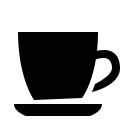     | Кофейня                   |
|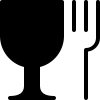        | Ресторан |
|   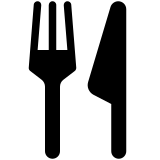    | Кафе                   |
|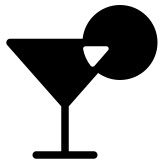        | Бар, паб |
|  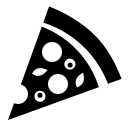  | Пиццерия                  |
|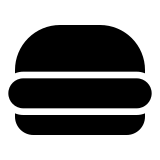       | Быстрое питание |
| 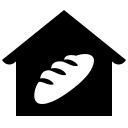    | Булочная                   |
|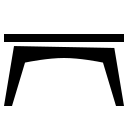       | Столовая |

In [ ]:
moscow_lat, moscow_lng = 55.751244, 37.618423

m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles="Cartodb Positron")

marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):
    if row['category'] == 'кофейня':
        icon_url = 'https://img.icons8.com/?size=128&id=2FD6pYQuKzhr&format=png'  
    elif row['category'] == 'ресторан':
        icon_url = 'https://img.icons8.com/?size=100&id=8300&format=png'
    elif row['category'] == 'кафе':
        icon_url = 'https://img.icons8.com/?size=160&id=kuqvHKbsjVtV&format=png'
    elif row['category'] == 'пиццерия':
        icon_url = 'https://img.icons8.com/?size=128&id=ZKwfz3uUjX0E&format=png'
    elif row['category'] == 'бар,паб':
        icon_url ='https://img.icons8.com/?size=160&id=gSfDLdJxeeGn&format=png'
    elif row['category'] == 'быстрое питание':
        icon_url ='https://img.icons8.com/?size=160&id=3IMITbl59zLf&format=png'
    elif row['category'] ==  'булочная':
        icon_url ='https://img.icons8.com/?size=128&id=l1clFG024sY9&format=png'
    else:
        icon_url ='https://img.icons8.com/?size=128&id=qQ9JM56zTLJk&format=png'
    # создаём объект с собственной иконкой размером 30x30
    icon = CustomIcon(icon_url, icon_size=(30, 30))
    
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
        icon=icon,
    ).add_to(marker_cluster)

df.apply(create_clusters, axis=1)
m

### Топ-15 улиц по количеству заведений

Нахожу топ-15 улиц по количеству заведений и строю визуализацию в формате тепловой карты - для каждой улицы видно распределение заведений и их количество в каждой из категорий.

In [ ]:
top_streets = df.groupby('street',
                         as_index=False).agg({'name':'count'}).sort_values('name', 
                                                                           ascending=False).head(15)

top_streets_cat = df[df['street'].isin
                     (top_streets['street'])].groupby(['street', 
                                                       'category'], 
                                                      as_index=False).agg({'name':'count'}
                                                                         ).sort_values('name', ascending=False)

In [ ]:
streets_pivot = top_streets_cat.pivot('street', 
                                      'category', 
                                      'name').fillna(0).sort_values(['кафе',
                                                                     'булочная', 
                                                                     'кофейня'], ascending=False)
streets_pivot['всего заведений'] = streets_pivot.sum(axis=1, numeric_only=True)
streets_pivot = streets_pivot.astype(int).sort_values('всего заведений', ascending=False)
plt.figure(figsize = (14,9))

sns.heatmap(streets_pivot, cmap='Spectral', annot=True, fmt='d', cbar=False, linewidth=0.5)
plt.title('Количество заведений по категориям на Топ-15 самых популярных улиц Москвы', fontsize=20)
plt.xlabel('Категория')
plt.xticks(rotation=55)
plt.ylabel('Улица');

**Вывод:** С большим отрывом лидирует Проспект мира - 184 заведения на этой улице. однако стоит учитывать и её протяженность - это большой проспект. Он лидирует практически во всех категориях.\
Следом идёт Профсоюзная улица и Ленинский проспект.\
Также заметно, что на улицах из Топ-15 расположены преимущественно кофейни, кафе, и рестораны. Это также коррелирует с анализом категорий в разных административных районах Москвы.

Теперь смотрю, в каких районах располагаются улицы с наибольшей проходимостью:

In [ ]:
top_districts = df[df['street'].isin(top_streets['street'])][['street', 
                                              'district']].groupby('street',
                                                                  as_index=False).agg({'district':'first'})
top_d = top_districts.groupby('district').agg({'district':'count'})
top_d.columns = ['популярных улиц']

plt.figure(figsize=(8,6))
sns.barplot(x='популярных улиц', y='district', data=top_d.sort_values('популярных улиц', ascending=False).reset_index());
plt.title('Количество улиц из топ-15 по популярности в каждом районе Москвы')
plt.ylabel('Улица')
plt.xticks(range(0, 5, 1));

**Вывод:** из топ-15 по проходимости улиц больше всего улиц находятся в САО - 4 улицы из 15. На втором месте - ЮЗАО с 3 популярными улицами.\
Занимательно, что ЦАО только в середине рейтинга по самым популярным улицам.

### Улицы, на которых есть только одно заведение общепита

Смотрю, на каких улицах расположено только одно заведения общепита.

In [ ]:
one_s = df.groupby('street', as_index=False).agg({'name':'count'}).query('name == 1')
one_s

Сколько таких улиц есть в процентном выражении?

In [ ]:
one_s['street'].count() / df['street'].count() * 100

Теперь создаю таблицу с заведениями, которые расположены на этих улицах, и ключевой информацией о них.

In [ ]:
one_streets = df[df['street'].isin(one_s['street'])
                ][['name', 'category', 'district', 
                   'rating', 'price', 'middle_avg_bill', 
                   'seats', 'street', 'chain', 'is_24_7']]
one_streets.head()

Интересно, в каких районах они расположены?

In [ ]:
one_streets['district'].value_counts()

Занимательно - заведения чаще всего бывают единственными на одну улицу в ЦАО: таких заведений 134. В остальных районах это число не превышает 49, заметен очень сильный отрыв.

In [ ]:
plt.figure(figsize=(13,5))
sns.distplot(one_streets['rating'], hist=True, kde=True,
                 kde_kws = {'linewidth': 2, 'alpha': 0.1})
plt.xlabel('Оценка посетителями')
plt.ylabel('Плотность распределения')
plt.title('Распределение оценок заведений на улицах, где есть только одно заведение');

Распределение оценок не отличается от распределения для остальных заведений.\
Какие это категории?

In [ ]:
one_streets['category'].value_counts()

Чаще всего такие заведения являются кафе, рестораном или кофейней.

Если оценить улицы, где есть только одно заведение, и это кофейня, то в каких районах их больше всего?

In [ ]:
one_streets.query('category =="кофейня"')['district'].value_counts()

**Вывод:** в Москве есть улицы, на которых расположено только одно заведение. Всего таких улиц - более 400, а заведения на этих улицах относятся к кафе, ресторанам или кофейням.
В подавляющем большинстве случаев кофейни из этого списка расположены в ЦАО.

### Исследование среднего чека

Теперь считаю медиану среднего чека по районам и строю фоновую картограмму, на которой отражаю медианный средний чек (медиана хорошо подходит, поскольку болеее устойчива к выбросам).

In [ ]:
bills = df.groupby('district', as_index=False).agg({'middle_avg_bill':'median'})
state_geo = '/datasets/admin_level_geomap.geojson'

moscow_lat, moscow_lng = 55.751244, 37.618423
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')
Choropleth(
    geo_data = state_geo,
data = bills,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='PuRd',
    fill_opacity=0.8,
    legend_name='Средний чек в заведениях по районам Москвы',
).add_to(m)
m

Также строю аналогичную карту, отражая на ней среднюю стоимость чашки кофе для кофеен.

In [ ]:
bills_cup = df.query('category=="кофейня"').groupby('district', as_index=False).agg({'middle_coffee_cup':'median'})

m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')
Choropleth(
    geo_data = state_geo,
data = bills_cup,
    columns=['district', 'middle_coffee_cup'],
    key_on='feature.name',
    fill_color='PuRd',
    fill_opacity=0.8,
    legend_name='Средняя цена чашки кофе в кофейнях Москвы по районам',
).add_to(m)
m

**Вывод**: самый высокий средний чек - в заведениях в ЦАО и ЗАО, в этих районах он находится в диапозоне 900 - 1000 рублей.\
На втором месте идут ЮЗАО, САО, СЗАО и ВАО - тут средний чек находится в диапозоне 600 - 700 рублей.\
В остальных районах он не превышает 540 рублей.

В целом нет прямой закономерности с уменьшением цен при отдалении от центра - общая картина показывает, что сумма среднего чека в западной части Москвы в среднем выше, чем сумма среднего чека в восточной части. При этом нельзя утверждать, что восточные районы находятся от центра дальше западных - и в западной части города есть очень удалённые точки.

**Вывод по средней цене чашки кофе:** Самая высокая стоимость - в ЦАО, ЗАО и ЮЗАО - она составляет 188 - 198 рублей.\
в САО, СЗАО и СВАО средняя стоимость - 156 - 167 рублей.\
В ЮАО и ЮВАО - 146 - 156 рублей.\
Самая низкая стоимость - в ВАО, до 146 рублей.

### Круглосуточные кофейни

Есть ли круглосуточные кофейни в датасете, и какова их доля от всех кофеен?

In [ ]:
coffee_24 = df.query('category == "кофейня" and is_24_7 == True')['name'].count()
num = coffee_24 / df.query('category == "кофейня"')['name'].count() * 100
print(f'В датасете есть {coffee_24} круглосуточных кофеен.')
print(f'Это {num.round(2)}% от всех кофеен.')

В каких районах они расположены?

In [ ]:
df.query('category == "кофейня" and is_24_7 == True')['district'].value_counts()

Также можно оценить, отличаются ли усредненные оценки для круглосуточных и некруглосуточных кофеен.

In [ ]:
coffee_24_7 = df.query('category == "кофейня"')
rate_no_24 = coffee_24_7.query('is_24_7 == False')['rating']
rate_24 = coffee_24_7.query('is_24_7 == True')['rating']

print(f'Средний рейтинг не круглосуточных кофеен: {rate_no_24.mean().round(2)}')
print(f'Средний рейтинг кофеен 24/7:{rate_24.mean().round(2)}')

**Вывод:** в датасете всего 59 круглосуточных кофеен, или 4.18% от всех кофеен.\
Подавляющее большинство таких кофеен находится в ЦАО.

### Часы работы кофеен в Топ-15 популярных сетей

Также оцениваю, какие часы работы у кофеен из Топ-15 сетей, не учитывая кофейни, работающие круглосуточно.

In [ ]:
df[df['name'].isin(top15['Сеть'])].query('category == "кофейня" and is_24_7 != True')['hours'].value_counts().head(10)

Практически все сетевые кофейни работают до 22:00, начало работы варьируется с 7 до 10 утра. Самый распространённый вариант - 10:00 - 22:00.

## Ответы на поставленные вопросы

1. Сколько всего кофеен в датасете? 
2.  В каких районах их больше всего, каковы особенности их расположения?
3.  Есть ли круглосуточные кофейни?
4.  Какие у кофеен рейтинги? Как они распределяются по районам?
5.   На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

1. Сколько всего кофеен в датасете?

В датасете есть 1417 кофеен. Это 17% от всех заведений.

2. В каких районах их больше всего, каковы особенности их расположения?

Больше всего кофеен - в ЦАО, их количество - 428. Это количество гораздо выше остальных районов - на втором месте идёт САО с 193 кофейнями и СВАО со 159 кофейнями.\
При этом есть улицы, на которых расположено только одно заведение. Если говорить о кофейнях, то наибольшее количество таких кофеен расположено в ЦАО - 33 кофейни. На втором месте САО с 10 кофейнями и ВАО с 8 кофейнями. Здесь также большой отрыв ЦАО по количеству налицо.\
Больше всего кофеен находится на Проспекте мира,  Ленинском и Ленинградском проспекте.

3. Есть ли круглосуточные кофейни?

Да, есть информация о кофейнях, работающих 24/7. Всего таких кофеен 59, или около 4% от всех кофеен в данных.\
При этом 40% всех круглосуточных кофеен расположены в ЦАО.\
Средний рейтинг не круглосуточных кофеен составляет 4.28, а средний рейтинг кофеен 24/7 - 4.21.

4. Какие у кофеен рейтинги? Как они распределяются по районам?

Усредненная оценка кофеейн в Москве - 4.28.
По районам лидирует кофейни, расположенные в ЦАО и СЗАО - средний рейтинг 4.38.\
На втором месте - САО, ВАО и ЮЗАО с оценкой в 4.29. \
Самые низкие рейтинги - в ЗАО и СВАО - там оценка не превышает 4.22.

5. На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

Этот показатель будет отличаться для разных районов Москвы. Средняя цена чашки капучино зависит от района.\
Самая высокая стоимость - в ЦАО, ЗАО и ЮЗАО - она составляет 188 - 198 рублей.\
в САО, СЗАО и СВАО средняя стоимость - 156 - 167 рублей.\
В ЮАО и ЮВАО - 146 - 156 рублей.\
Самая низкая стоимость - в ВАО, до 146 рублей.\
В целом эту тенденцию за исключаем ВАО можно описать следующим образом: самая высокая средняя стоимость чашки кофе - в ЦАО, ЗАО и ЮЗАО. На втором месте идут северные районы, на третьем - южные, а на последнем месте - ВАО.



6. Какие часы работы у популярных сетей кофеен? 

Практически все сетевые кофейни из топ-15 по популярности работают до 22:00, начало работы варьируется с 7 до 10 утра. Самый распространённый вариант - 10:00 - 22:00.

7. Сколько кофеен есть среди Топ-15 самых популярных сетей Москвы(по количеству точек)?

Кофейни составляют самый большой процент в Топ-15 по популярности - они составляют треть от всех категорий.\
При этом даже среди топ-5 кофейнями являются 3 из 5 заведений.



## Подведение итогов

Я провёл исследование на основании датасета заведений общепита Москвы Яндекс.Карт и Яндекс.Бизнес по состоянию на лето 2022 года. Целью исследования был поиск закономерностей и метрик, которые помогут принять решение для открытия новой точки общепита: какие категории заведений наиболее популярны, какие у них цены и особенности расположения, оценки посетителей и иные зависимости.

Я выполнил предобработку данных. Полностью дублирующихся строк не обнаружено. В названиях заведений обнаружено большое количество неявных дубликатов - разные варианты написания одних и тех же заведений.\
Данные в Яндекс.Бизнес заполняются пользователями и на основе открытых источников, это и стало причиной неявных дублей. Я обработал названия, максимально исключив такие дубли.\
Помимо этого, обнаружено много пропусков - они могут быть связаны как с человеческим фактором (в информации о среднем чеке), так и с техническими особенностями при выгрузке с Яндекс.Карт. Пропуски решено оставить, поскольку их удаление или заполнение нулём могли повлиять на результаты исследования, важно минимизировать это влияние.\
После предобработки я добавил новые колонки - вынес название улицы, где расположено заведение, а также добавил колонку с признаком, работает ли заведение 24/7.
В завершение предобработки я изучил аномалии и исключил выбросы в размере среднего чека и количестве сидячих мест в заведении.

После предобработки я приступил к анализу.

Я изучил распределение заведений Москвы по категориям. Выяснилось, что самую большую долю всех заведений составляют **рестораны, кафе и кофейни**. Ресторанов - **28.3%**, кафе - **24.3%** и кофеен - **16.8%**.\
Меньше всего - булочных.

Далее я изучил среднее количество сидящих мест в заведениях. Установлено, что самая большая вместимость в среднем у **ресторанов** (более **80** мест), **баров/пабов** (**80** мест) и **кофеен** (более **70** мест). Меньше всего мест в среднем в булочных.

После этого проанализировал соотношение сетевых и несетевых заведений в Москве. Значительная часть заведений Москвы является сетевыми - **38% сетевых** заведений против **62% несетевых**.\
Также я узнал, какие категории чаще являются сетевыми.\
Больше всего сетевых заведений в категории **"булочная" - 60%** от всех заведений. После этого идут **пиццерии** и **кофейни** - в каждой из этих категорий доля **сетевых** заведений составляет около **50%**.

За этим последовал список Топ-15 сетей Москвы по популярности - оценил эту метрику по количеству точек в каждой сети.\
 Среди **топ-15** заведений **самой популярной** категорией являются **кофейни** - более **33%**, или трети от всех заведений. С кофейнями по популярности сопоставимы только **кафе** - более **26%**.\
Если рассматривать сами сети, то лидер по популярности - кофейня Шоколадница, у неё заметно больше точек, чем у всех остальных.\
После Шоколадницы в рейтинге следуют 2 пиццерии - Доминос пицца и Додо пицца. Далее снова идут кофейни - one price coffee и cofix.

Исходя из фактов выше - если смотреть на топ-15 популярных сетей Москвы, то **наибольшую популярность** имеют именно **кофейни**. И вот, почему:
* кофейни составляют треть от всего топ-15
* самое популярное заведение с большим отрывом по точкам - тоже кофейня
* даже в Топ-5 популярных заведений 3 из 5 позиций занимают кофейни.

После анализа Топ-15 я перешёл к анализу количества заведений в разных административных районах Москвы, а также категорий заведений в каждом из районов.\
Среди всех районов по плотности заведений заметно **лидирует ЦАО** - в этом районе находится **более 2000 заведений**. Количество заведений в остальных районах не превышает **1500**. **Меньше всего** заведений в **ЮЗАО, ЮВАО и СЗАО** - там их количество не превышает **700** на район.\
При анализе по категориям стало заметно, что **независимо** от района лидируют **три категории - кафе, ресторан и кофейня**. При этом в ЦАО лидируют **рестораны**, а во всех остальных районах - **кофейни**.\
**Четверть** всех заведений расположены в **ЦАО**.\
Подавляющее большинство всех **кофеен** расположено в **ЦАО** с большим отрывом от остальных районов по количеству.\
В ЦАО расположено **425** кофеен.

Далее я проанализировал, какие оценки выставляют посетители заведением разных категорий, и сравнил их друг с другом.\
Установлено, что **во всех** категориях оценка заведения в среднем составляет от **4** до **4.5** баллов.\
При этом самый высокий средний рейтинг - у **баров, 4.39**.\
На втором и третьем месте - **рестораны и пиццерии**. **Кофейни** находятся посередине - средний рейтинг **4.28**.\
Также я сравнил рейтинг круглосуточных и не круглосуточных кофеен.\
Средний рейтинг не круглосуточных кофеен: **4.28**.\
Средний рейтинг кофеен 24/7: **4.21**.

После анализа оценок я составил **Топ-15 улиц** по количеству заведений, на них расположенных, также посмотрел, какие категории расположены на этих улицах.\
С большим отрывом лидирует **Проспект мира** - **184** заведения на этой улице. Он лидирует практически во всех категориях.\
Однако стоит учитывать и её протяженность - это большой проспект.\
Следом идёт **Профсоюзная улица и Ленинский проспект**.\
Также заметно, что на **улицах из Топ-15** расположены преимущественно **кофейни, кафе, и рестораны**. Это также коррелирует с анализом категорий в разных административных районах Москвы.

Также я изучил улицы, на которых расположено **только одно заведение**. Всего таких улиц - **более 400**, или около **5%** от всех улиц. Чаще всего это переулки и проезды. Заведения на этих улицах относятся к **кафе, ресторанам или кофейням**.\
Я провёл анализ по **кофейням** в этом списке - выяснилось, что в подавляющем большинстве случаев **такие улицы расположены в ЦАО**.

Следом я провёл анализ среднего чека в заведениях в зависимости от района.\
Самый **высокий** средний чек - в заведениях в **ЦАО и ЗАО**, в этих районах он находится в диапозоне **900 - 1000** рублей.\
На втором месте идут **ЮЗАО, САО, СЗАО и ВАО** - тут средний чек находится в диапозоне **600 - 700** рублей.\
В остальных районах он не превышает **540** рублей.

В целом нет прямой закономерности с уменьшением цен при отдалении от центра - общая картина показывает, что сумма среднего чека в западной части Москвы в среднем выше, чем сумма среднего чека в восточной части. При этом нельзя утверждать, что восточные районы находятся от центра дальше западных - и в западной части города есть очень удалённые точки.

Помимо этого, я оценил зависимость средней цены чашки кофе от района Москвы.\
Самая высокая стоимость - в **ЦАО, ЗАО и ЮЗАО** - она составляет **188 - 198** рублей.\
в **САО, СЗАО и СВАО** средняя стоимость - **156 - 167** рублей.\
В **ЮАО и ЮВАО** - **146 - 156** рублей.\
Самая низкая стоимость - в **ВАО, до 146** рублей.\
В целом эту тенденцию за исключаем ВАО можно описать следующим образом: самая высокая средняя стоимость чашки кофе - в центре и в западных районах. На втором месте идут северные районы, на третьем - южные, а на последнем месте - ВАО.

В завершении исследования я проанализировал **круглосуточные кофейни**.\
Выяснилось, что в датасете всего 59 круглосуточных кофеен, или **4.18%** от всех кофеен.\
Подавляющее большинство таких кофеен находится в **ЦАО**.

Помимо этого выяснил, что прктически все сетевые кофейни из топ-15 сетей работают до 22:00, начало работы варьируется с 7 до 10 утра. Самый распространённый вариант - 10:00 - 22:00.

## Финальные выводы

Главной целью исследования было выявить Выявить, какими характерными признаками обладают наиболее популярные заведения общепита, а также найти закономерности, которые помогут сделать выбор в пользу той или иной категории, расположения или среднего чека.\
В частности, инвесторов интересовало открытия кофейни.\
Вопрос конкуренции в этой сфере не учитывается, исходя из запроса фонда.

Вот несколько фактов по результатам анализа данных **о всех заведениях общепита в Москве**.

1. Тройка категорий-лидеров общепита по популярности - рестораны, кафе и кофейни.
2. Самая большая вместимость (в среднем) у заведений в категориях рестораны(80+ мест), бары(80 мест) и кофейни (70 мест).
3. Заметная часть заведений Москвы - сетевые. Их количество - 38%, несетевых - 62%.
4. Среди категорий сетевых заведений самый большой процент сетевых точек - у булочных(60%), кофеен и пиццерий (в каждой 50% сетевых заведений).
5. В топ-15 сетевых заведений первое место занимает Шоколадница с категорией "кофейня". Среди топ-15 кофеен больше всего - 33%, или треть от всех сетей. На втором месте - кафе, 26% от всего топа.
6. Оценка посетителями заведений во всех категориях варьируется от 4 до 4.5 баллов. Наивысший балл - у баров, 4.39 балла. Самый высокий средний рейтинг - у заведений, расположенных в ЦАО.
7. Больше всего заведений находится в ЦАО - более 2000 точек. Это четверть всех заведений в датасете. Количество заведений в остальных районах не превышает 1500. Меньше всего заведений в ЮЗАО, ЮВАО и СЗАО - там их количество не превышает 700 на район.
8. Независимо от района по популярности лидируют 3 категории - кофейни, кафе и рестораны. При этом в ЦАО лидируют рестораны, а в остальных районах - кофейни.
9. Самые популярные по количеству заведений улицы - Проспект мира, Профсоюзная улица и Ленинский проспект. При этом на всех улицах из Топ-15 популярных улицах самые популярные категории - также кофейни, кафе и рестораны, как и в предыдущем пункте.
10. Есть улицы, на которых расположено только одно заведение. Таких улиц более 400, или 5% от всех улиц. Преимущественно это переулки и проезды. Заведения на этих улицах также чаще всего относятся к кофейням, кафе и ресторанам.
11. Самый высокий средний чек - в заведениях в ЦАО и ЗАО, в этих районах он находится в диапозоне 900 - 1000 рублей.
    На втором месте идут ЮЗАО, САО, СЗАО и ВАО - тут средний чек находится в диапозоне 600 - 700 рублей.
    В остальных районах он не превышает 540 рублей.
    

А здесь - ключевые факты, которые касаются именно **кофеен в Москве**.

1. Кофейни входят в тройку самых популярных категорий заведений в Москве.
2. В среднем кофейни имеют вместимость в 70 сидячих мест.
3. Кофейни входят в тройку самых популярных сетевых категорий. 50% всех кофеен в данных - сетевые.
4. Кофейни составляют самую большую долю от Топ-15 популярных сетей (треть от всех сетей) и занимают лидирующие позиции в рейтинге. Самая популярная сеть Москвы - тоже кофейня (речь о Шоколаднице). Из Топ-5 сетей 3 из 5 позиций также занимают кофейни.
5. Средняя оценка кофеен пользователями - 4.28 балла.
6. Средняя оценка кофеен варьируется в зависимости от района. Самый высокий рейтинг - у кофеен в ЦАО и СЗАО, далее идут ЮЗАО, САО и ВАО.
5. среди всех категорий общепита кофейни лидируют по популярности (количеству заведений) во всех административных районах города за исключением ЦАО - там с небольшим отрывом лидируют рестораны, кофейни на втором месте.
6. Подавляющее большинство всех кофеен Москвы находится в ЦАО с большим отрывом по количеству от остальных районов.
7. Есть улицы, на которых расположено только одно заведение. Несмотря на пункт 6, больше всего таких улиц с кофейнями расположены в ЦАО.
8. В данных есть записи о 59 круглосуточных кофейнях, это около 4% от всех кофеен. Преимущественно они расположены в ЦАО.
9. Практически все сетевые кофейни из топ-15 сетей работают до 22:00, начало работы варьируется с 7 до 10 утра. Самый распространённый вариант - 10:00 - 22:00.
10. Средняя стоимость чашки капучино варьируется в зависимости от района города.\
    Самая высокая стоимость - в ЦАО, ЗАО и ЮЗАО - она составляет 188 - 198 рублей.\
    в САО, СЗАО и СВАО средняя стоимость - 156 - 167 рублей.\
    В ЮАО и ЮВАО - 146 - 156 рублей.\
    Самая низкая стоимость - в ВАО, до 146 рублей.\
    В целом эту тенденцию за исключаем ВАО можно описать следующим образом: самая высокая средняя стоимость чашки кофе - в центре и в западных районах. На втором месте идут северные районы, на третьем - южные, а на последнем месте - ВАО.
    


## Заключение по экономической целесообразности

Кофейня - хороший вариант для открытия заведения в Москве: эта категория входит в тройку лидирующих во всех районах города, что говорит о популярности формата и спросе на него. Кроме этого, средний рейтинг кофеен находится на очень хороших значениях.\
Важно выбрать место с наибольшей проходимостью, в районе с хорошим спросом на эту категорию и с хорошим средним рейтингом кофеен. Помимо этого, важна и стоимость кофе.

Самая лучшая проходимость - у заведений в ЦАО, это объясняет также то, что подавляющее большинство всех заведений Москвы находятся именно в ЦАО. Здесь(а также в ЗАО)с охраняется наивысшая цена чашки кофе, как и наивысшие рейтинги.\
Однако если посмотреть на топ-15 улиц города по проходимости, то станет заметно, что эти улицы чаще всего находятся в САО.\
То есть район в целом показывает хорошую проходимость во всех категориях. ЦАО находится лишь в середине рейтинга. При этом аренда в САО обойдётся существенно выгоднее, чем в ЦАО.\
В пользу этого также говорит то, что после "дорогих" районов ЦАО и ЗАО следует именно САО - и по размеру среднего чека, и по средней стоимости чашки капучино. Таким образом, можно выбрать не самый популярный вариант ЦАО с огромной плотностью заведений, а САО, в котором наилучшая проходимость сочетается с популярностью кофеен среди остальных категорий (они на втором месте). Кроме этого, САО находится на втором месте по размеру среднего чека среди районом Москвы, и это сулит хороший доход. При этом кофе будет более доступен для посетителей по цене, нежели в ЦАО.